In [44]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import copy
from PIL import Image

The dynamics of this task makes it difficult for Hubert to complete since it is very easy to get thrown back to start.

The dynamics from the powered flight gives Hubert some pointer to what to do, but it will give him somewhat
incorrect information.


In [ ]:
with open("../Data/skyline.txt") as file:
    raw_skyline = file.read()

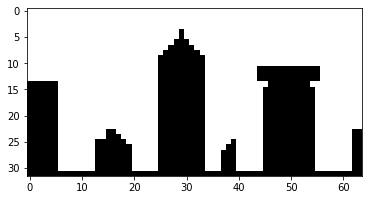

In [46]:
skyline = raw_skyline.split('\n')
skyline = np.asarray([np.asarray([int(x) for x in row.split('\t')]) for row in skyline])
plt.imshow(skyline, cmap='gray')

In [47]:
with open("../Data/horizontal_wind.txt") as file:
    raw_hor_wind = file.read()
with open("../Data/vertical_wind.txt") as file:
    raw_ver_wind = file.read()

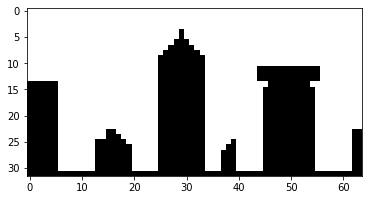

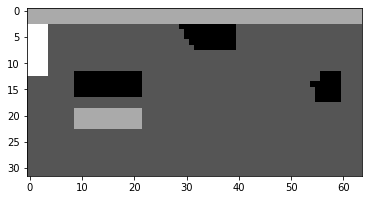

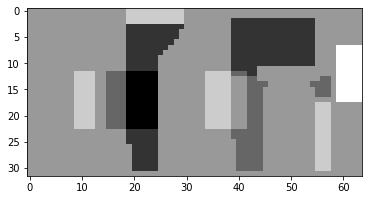

In [48]:
hor_wind = np.asarray([np.asarray([int(x) for x in row.split('\t')]) for row in raw_hor_wind.split('\n')])

vert_wind = np.asarray([np.asarray([int(x)+3 for x in row.split('\t')]) for row in raw_ver_wind.split('\n')])
# n_im = np.asarray([skyline, vert_wind, hor_wind])

plt.imshow(skyline, cmap='gray')
plt.pause(0.01)
plt.imshow(hor_wind, cmap='gray')
plt.pause(0.01)
plt.imshow(vert_wind, cmap='gray')

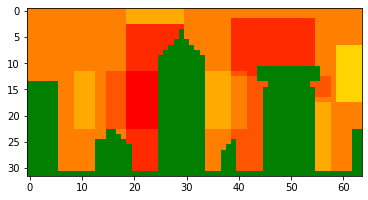

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


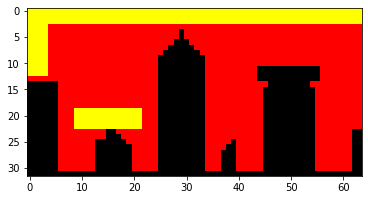

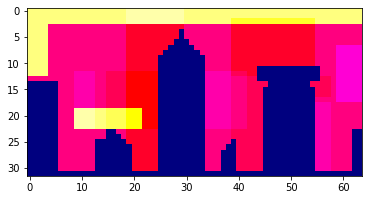

In [49]:
v_im = [[[] for i in range(64)] for j in range(32)]
h_im = copy.deepcopy(v_im)
t_im = copy.deepcopy(v_im)
p_im = copy.deepcopy(v_im)

for i in range(32):
    for j in range(64):
        p_im[i][j] = [skyline[i][j], 0, 0]
        v_im[i][j] = [skyline[i][j], vert_wind[i][j]/6, 0]
        h_im[i][j] = [skyline[i][j], (hor_wind[i][j]/1)*2, 0]
        t_im[i][j] = [skyline[i][j], hor_wind[i][j]/1, vert_wind[i][j]/6]

plt.imshow(v_im)
plt.pause(0.01)
plt.imshow(h_im)
plt.pause(0.01)
plt.imshow(t_im)
final = t_im

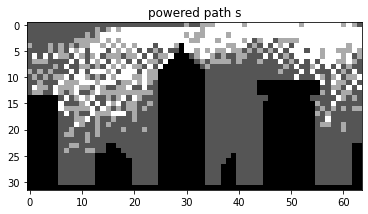

In [50]:
t_im = np.asarray(t_im)
with open("../Data/powered_flight.txt") as file:
    path = file.read()

s_path = [[int(xy.split('\t')[0]), int(xy.split('\t')[1])] for xy in path.split('\n')]
s_prime_path = [[int(xy.split('\t')[4]), int(xy.split('\t')[5])] for xy in path.split('\n')]


path_img = copy.deepcopy(skyline)

for x, y in s_path:
    try:
        path_img[x-1][y-1] += 1
    except IndexError:
        print(x, y)
        print(t_im.shape)
        sys.exit(1)

plt.title("powered path s")
plt.imshow(path_img, cmap='gray')
plt.pause(0.01)
path_img = copy.deepcopy(p_im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


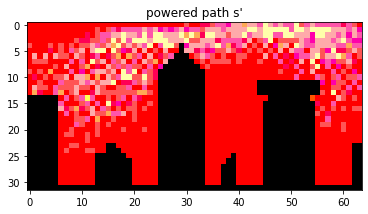

In [51]:
for x, y in s_path:
    path_img[x-1][y-1][2] += 1/3

for x, y in s_prime_path:
    try:
        path_img[x-1][y-1][1] += 1/3
    except IndexError:
        print(x, y)
        print(t_im.shape)
        sys.exit(1)

plt.title("powered path s'")
plt.imshow(path_img)

For hyperparameters I did a grid search on all the params to find the ones that performed well:

Steps >= 25

1 > Alpha >= 0.7

1 > Lambda >= 0.7

0.2 >= Epsilon >= 0.1

Without a discount factor the values would spread all the way back to the start with dp, so Hubert would get lost.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

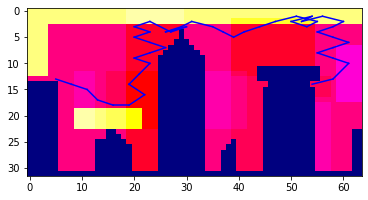

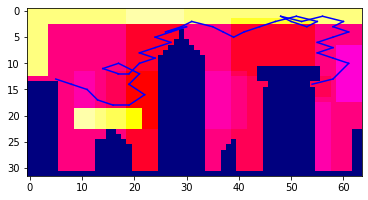

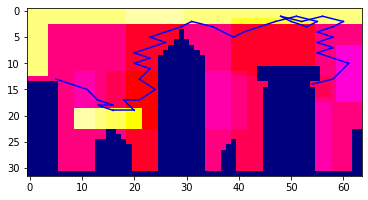

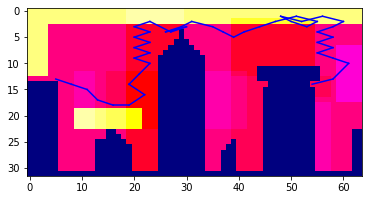

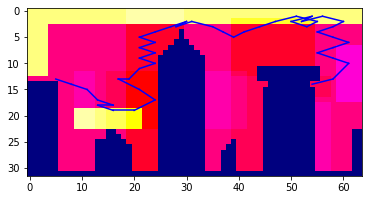

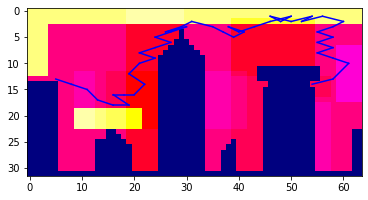

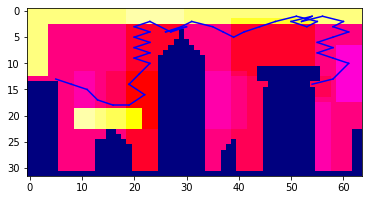

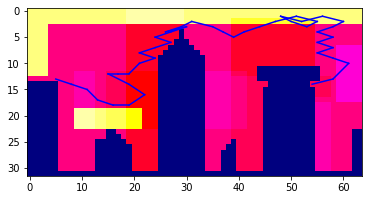

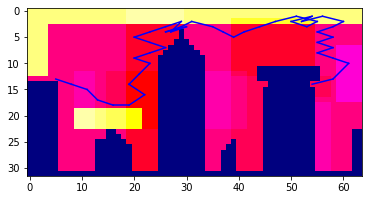

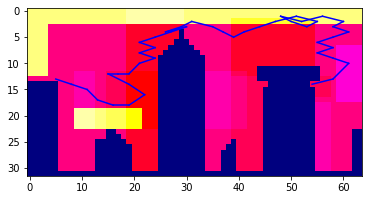

In [60]:
paths_name = ["con-dor_path_l0.7a0.7e0.2s100.txt",
                "con-dor_path_l0.7a0.9e0.1s25.txt",
                "con-dor_path_l0.7a0.9e0.1s50.txt",
                "con-dor_path_l0.7a0.9e0.2s25.txt",
                "con-dor_path_l0.7a0.9e0.2s50.txt",
                "con-dor_path_l0.9a0.7e0.1s25.txt",
                "con-dor_path_l0.9a0.9e0.1s25.txt",
                "con-dor_path_l0.9a0.9e0.1s50.txt",
                "con-dor_path_l0.9a0.9e0.2s50.txt",
                "con-dor_path_l0.9a0.7e0.1s100.txt"]
for path_name in paths_name:
    with open("../Data/condor_path/" + path_name) as file:
        path = file.read()

    s_path = [[int(xy.split(' ')[0]), int(xy.split(' ')[1])] for xy in path.split('\n') if xy != '']

    fig, ax = plt.subplots()
    ax.imshow(final)
    lastX, lastY = 5, 13
    for x, y in s_path:
        ax.plot([lastX, x], [lastY, y], color="blue")
        lastY = y
        lastX = x
    plt.show()

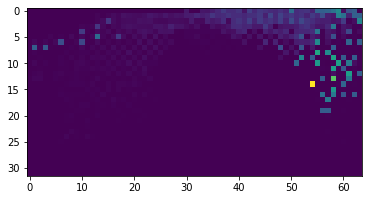

In [59]:
with open("../Data/condor_path/model.txt") as file:
    raw_model = file.read()


model = raw_model.split('\n')
model = np.asarray([np.asarray([float(x) for x in row.split(' ') if x != '' and x != ' ']) for row in model])
plt.title("Action value function for path size 45")
plt.imshow(model)

Total time for 46 step run: 34246 seconds, or 9.5 hours

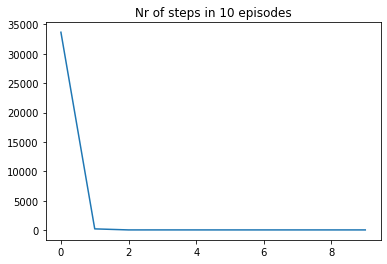

In [61]:
steps = [33663, 222, 45, 46, 45, 45, 45, 45, 45, 45]

plt.title("Nr of steps in 10 episodes")
plt.plot(steps)
plt.show()